# TP de SD 211


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.sparse
import scipy.sparse.linalg

In [2]:
def build_matrix_from_faces(folder='orl_faces', minidata=False):
    # load images
    # 400 images of size (112, 92)
    M = []
    if minidata is True:
        nb_subjects = 1
    else:
        nb_subjects = 40
    for subject in range(1, nb_subjects + 1
                        ):
        for image in range(1, 11):
            face = plt.imread(folder + '/s' + str(subject)
                              + '/' + str(image) + '.pgm')
            M.append(face.ravel())

    return np.array(M, dtype=float)

def vectorize(W, H):
    return np.concatenate((W.ravel(), H.ravel()))

def unvectorize_M(W_H, M):
    # number of elements in W_H is (n+p)*k where M is of size n x m
    # W has the nk first elements
    # H has the kp last elements
    n, p = M.shape
    k = W_H.shape[0] // (n + p)
    W = W_H[:n * k].reshape((n, k))
    H = W_H[n * k:].reshape((k, p))
    return W, H

In [3]:
# Small data to test the algorithm
M = build_matrix_from_faces(folder=r'C:\Users\Antoine\Downloads\att_faces', minidata=True)
def unvectorize(W_H): return unvectorize_M(W_H, M)
k = 2

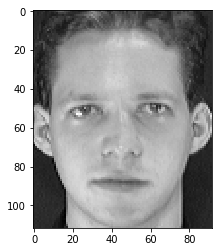

In [4]:
# To see the first face:
plt.imshow(M[0].reshape((112, 92)), cmap='gray'); plt.show()

## Question 1.


Il y a 400 images et ces images ont 92*112 pixels.

## Question 2.1

Propriété 1:On remarque tout d'abord que si une fonction f $\mathbb{R}^{n}\rightarrow\mathbb{R}$ est convexe alors toute fonction $\tilde{f}$ définit par $\forall(x,y)\in \mathbb{R}^{2}, \tilde{f}(x,y)=f(0,...,0,x,0,...,0,y,0,..)$ est aussi convexe.
Considérons la fonction g:$(x,y)\rightarrow (1-xy)^{2}$

On a: $g(0,0)=1$, $g(1,1)=0$ or $g(1/2,1/2)=9/16$

Ainsi, $1/2\times g(0,0)+1/2\times g(1,1)\leq g(1/2,1/2)$

Donc g n'est pas convexe.

Or si g n'est pas convexe alors par contraposé de la propriété 1, la focntion objectif n'est elle aussi pas convexe

Claculons le gradient de la fonction par la methode de la différentielle.
Commençons par calculer la première partie du gradient en différenciant par rapprot à H:
On a: $\frac{1}{2np}||M-W(H+\delta H)||^{2}_{2}=\frac{1}{2np}<M-W(H+\delta H);M-W(H+\delta H)>$
                                         $=\frac{1}{2np}(||M-WH||^{2}_{2}-2<M-WH;W\delta H> +o(H))$
                                         $=\frac{1}{2np}(||M-WH||^{2}_{2}-2<^{t}W(M-WH);\delta H>) +o(H)$
                                         
                                         
                                         
On en déduit par identification que la première partie du gradient est $\frac{-1}{np}^{t}W(M-WH)$


Maintenant calculons la deuxième parite du gradient par rapport à W:

\begin{align}
\frac{1}{2np}||M-(W+\delta W)H||^{2}_{2}&=\frac{1}{2np}<M-(W+\delta W)H;M-(W+\delta W)H> \\
                                        &=\frac{1}{2np}(||M-WH||^{2}_{2}-2<M-WH;\delta WH> +o(W))\\
                                        &=\frac{1}{2np}(||M-WH||^{2}_{2}-2<(M-WH)^{t}H;\delta W> +o(W))
                                        \end{align}


Donc la deuxième partie du gradient est $\frac{-1}{np}(M-WH)^{t}H$

Si on appelle g la fonction objectif alors son gradient est donné par:
$\nabla g=\begin{pmatrix} 
\frac{-1}{np}(M-WH)^{t}H  \\
\frac{-1}{np}^{t}W(M-WH)
\end{pmatrix}$




Montrons maintenant que la gradient n'est  pas Lipschitz continue,
et pour cela nous allons nous placer dans la cas où n=k=p=1:

On rappelle que le gradient de G est lipschitzien s'il existe L $\in \mathbb{R}^{+}$ tel que:
$|| \nabla G (W_{1},H_{1})- \nabla G(W_{2},H_{2})|| \leq L||(W_{1},H_{1})-(W_{2},H_{2})||$


prenons maintenant $W_{1} et H_{1}$ les fonctions identités et $W_{2}, H_{2} $nulles.


Dans notre cas:
$|| \nabla G (W_{1}(x),H_{1}(x))- \nabla G(W_{2}(x),H_{2}(x)||^{2}=(-x(m-x^{2})+m^{2})^{2}+(-x(m-x^{2})+m^{2})^{2}=2x^{2}(x^{2}-m)^{2}$ 

Or:

$||(W_1(x)-W_2(x),H_1(x)-H_2(x))||^2 = (x-0)^2 + (x-0)^2 = 2x^2$

Ainsi si on écrit l'inégalité de lichitz on obtient que $\forall x \in \mathbb{R}$
$2x^{2}(x^{2}-m)^{2}\leq L2x^{2}$
en divisant par $x^{2}$, on obtient qu'un polynome de degrès 4 est inférieur à une constante  $\forall x \in \mathbb{R}$ Ce qui est ilmpossible donc le gradient n'est pas lipschitzien.

## Question 3.1

L'avantage de ce choix est que l'on est pas loin du resultat à obtenir à savoir la factorisation par deux matrices W et H.
En effet la décomposition svd permet de transformer M en un produit de trois matrices U, $\Sigma$ et V $M=U\Sigma V$ avec $\Sigma$ une matrice qui ressemble à une homothètie mais pas totalement car elle est de dimentinon $p\times k$ avec $p\ne k$. On se rend bien compte que l'on est proche de la factorisation WH c'est donc un bonne initialisation.

## Question 3.2

Pour ce qui est du gradient nous l'avons déjà calculé précédemment car il s'agit de la deuxième composante du gradient de g précédemment définit soit:
On sait que la fonction carré préserve la convexité donc montrer que g est convexe revient à montrer que:

$h:W \rightarrow ||M-WH_{0}||$
est convexe:


soit 
$(W_{1},W_{2})\in M_{n,k}$ et  $\lambda \in [0,1]$

\begin{align}
||M-(\lambda W_{1}+(1-\lambda)W_{2})H_{0}|| &=||\lambda M+(1-\lambda) \\
    &=M-(\lambda W_{1}+(1-\lambda)W_{2})H_{0}|| \\
    &=||\lambda M-\lambda W_{1}H_{0}+(1-\lambda)M-(1-\lambda)W_{2}H_0|| \\
    &=\lambda|| M- W_{1}H_{0}||+(1-\lambda)||M-W_{2}H_0||
\end{align}

Par inégalité triangulaire on obtient bien que g est convexe
    


$ \nabla g =\frac{-1}{np}^{t}W(M-WH_{0})$


## Question 3.3

In [5]:
def compute_g_w(W):
    n,p=M.shape
    L=M-np.dot(W,H0)
    return (1/(2*n*p))*np.linalg.norm(L,"fro")**(2)

In [6]:
def compute_grad_g(W):
    n,p=M.shape
    return -1/(n*p)*np.dot(M-np.dot(W,H0),H0.T)

## Question 3.4

$prox_{\gamma\iota_{\mathbb{R}^{+}}}=argmin({\gamma\iota_{\mathbb{R}^{+}}(y)+\frac{1}{2}||y-x||^{2}})$

Or, on remarque que si $x<0$ alors y ne peut pas être négatif car sinon le prox vaudrait $+\infty$ pour minimiser il faut donc que y soit nul.

Dans le cas où $0\leq x$ alors en prenant $y=x$ on remarque ${\gamma\iota_{\mathbb{R}^{+}}(y)+\frac{1}{2}||y-x||^{2}}=0$ et $y=x$ est le seul point pour lequel $||x-y||=0$ 

Donc:
Pour $x<0$, le prox vaut 0 et pour $ 0 \leq x$ le prox vaut x:

Donc le prox correspond donc bien à la projection sur $\mathbb{R}^{+}$

## Question 3.5

In [7]:
def projected_gradient_method(val_g, grad_g,W0, gamma,N):
    W=W0
    for i in range (N):
        W=W-gamma*grad_g(W)
        W=np.maximum(W,0)
    return val_g(W)

## Question 3.6

In [8]:
W0, S, H0 = scipy.sparse.linalg.svds(M,k)
W0 = np.maximum(0, W0 * np.sqrt(S)) 
H0 = np.maximum(0,(H0.T * np.sqrt(S)).T)
n,p=M.shape
K=np.dot(np.transpose(H0),H0)
L0=np.linalg.norm(K,"fro")
print((n*p)/L0)
projected_gradient_method(compute_g_w,compute_grad_g,W0,(n*p)/L0,100)

2.222664966607934


442.2878543960478

## Question 4.1

Nous allons ici utiliser le line search:
Cette methode consiste à trouver à chaque étape une valeur de $\gamma$ idéale permettant d'éviter certains problèmes.
Comme le gradient est lipschitz continue, comme il est indiqué à la question 3.2 cela est possible.
à chaque étape on doit trouver $\gamma_{k}$ tel que:
$\gamma_{k}=\underset{\gamma \in \underset{+}{\mathbb{R}}}{argmin} \ G(x_{k}-\gamma \nabla f(x_{k}))$
Pour trouver ce $\gamma_k$ on va dériver cette fonction pour en trouver le minimum.
Si on nomme $F_k$ cette fonction alors on a:
$\frac{d F_k}{d \gamma}(\gamma)=<-\nabla g(x_k), \nabla g(x_k - \gamma \nabla g(x_k))>$


Le gamma que l'on cherche est donc celui qui annule cette expression.

Pour le trouver nous allons utiliser la mathode de newton.

In [9]:
def line_search_projected_gradient(val_g, grad_g, W0, gamma0,N):
    W=W0
    gamma = gamma0
    for i in range (1,N):
        F= lambda gamma: np.trace(-np.dot(grad_g(W).T,grad_g(W - gamma*grad_g(W))))
        W = ((W - gamma*grad_g(W))>0)*(W - gamma*grad_g(W))
        gamma = scipy.optimize.newton(F, gamma)
    return val_g(W)

In [10]:
line_search_projected_gradient(compute_g_w, compute_grad_g, W0, n*p/L0,10)

442.6972009318645

## Question 4.2

On remarque que le second algorithme met moins de temps à s'executer que le premier. C'est tout à fait normal car la procédure du line search est plus efficace.

## Question 5.1

In [11]:
def compute_g_w_2(W,H):
    n,p=M.shape
    L=M-np.dot(W,H0)
    W=W.reshape((n,k))
    return (1/(2*n*p))*np.linalg.norm(L,"fro")**(2)

In [12]:
def compute_grad_g_2(W,H):
    n,p=M.shape
    W=W.reshape((n,k))
    return vectorize((-1/n*p)*np.dot((M-np.dot(W,H)),H.T),-1/(n*p)*np.dot(W.T,M-np.dot(W,H)))

In [13]:
def projected_gradient_method_2(valg,gradg,W0,H0,gamma0,N):
    W=W0
    H=H0
    gamma=gamma0
    for i in range (N):
        W,H=unvectorize_M(np.maximum(0,vectorize(W,H)-gamma*gradg(W,H)),M)
        L=unvectorize_M(vectorize(W,H)-gamma*gradg(W,H),M)
        F=lambda gamma: -np.dot(gradg(W,H).T,gradg(L[0],L[1]))
        gamma=scipy.optimize.newton(F,gamma)

    return vectorize(W,H), valg(W,H)

In [14]:
projected_gradient_method_2(compute_g_w_2,compute_grad_g_2,W0,H0,1,1000)


C:\Users\Antoine\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:195: RuntimeWarning: Tolerance of 0.00019999999999997797 reached
  warnings.warn(msg, RuntimeWarning)
C:\Users\Antoine\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:195: RuntimeWarning: Tolerance of 0.0002000099999999172 reached
  warnings.warn(msg, RuntimeWarning)
C:\Users\Antoine\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:195: RuntimeWarning: Tolerance of 0.00020002000049990087 reached
  warnings.warn(msg, RuntimeWarning)
C:\Users\Antoine\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:195: RuntimeWarning: Tolerance of 0.000200030001499929 reached
  warnings.warn(msg, RuntimeWarning)
C:\Users\Antoine\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:195: RuntimeWarning: Tolerance of 0.00020004000300000158 reached
  warnings.warn(msg, RuntimeWarning)
C:\Users\Antoine\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:195: RuntimeWarning: Tolerance of 0.0002000500050001186 reached
  warnings.warn

RuntimeError: Failed to converge after 50 iterations, value is nan

## Question 5.2 

Prenons la tième itération on a par définition:

$W_t = \underset{W}{argmin} \frac{1}{2np} ||M - WH_{t-1}||^2$

$H_t = \underset{H}{argmin} \frac{1}{2np} ||M - W_t H||^2$

On a alors les inégalités suivantes:

$\frac{1}{2np} ||M - W_t H_t||^2 \le \frac{1}{2np} ||M - W_t H_{t-1}||^2$

$\frac{1}{2np} ||M - W_t H_{t-1}||^2 \le \frac{1}{2np} ||M - W_{t-1} H_{t-1}||^2$

Par définition

On en déduit donc que la suite est décroissante.
Puis comme elle est minorée par 0 alors elle est convergente

## Question 5.3

Pour coder cette methode, il  suffit de déterminer $W_{t}$ et $H_{t}$ à chaque étape. Pour déterminer les minimums des fonctions nous allons encore utiliser la methode de la descente du gradient. Sauf que cette fois si il s'agit de déterminer les gradients en fixant une des deux variables.


In [ ]:
def gradient_H(W,H):
    return -(1/(n*p))*np.dot(W.T,M - np.dot(W,H))


In [ ]:
def gradient_W(W,H):
    return -(1/(n*p))*np.dot((M-np.dot(W,H)),H.T)

In [ ]:
def determ_W_t(g, gradw, W0, H0, gamma, N):
    W,H = W0, H0
    for i in range(1,N):
        W = np.maximum(0,W - gamma*gradw(W,H))
    return W

In [ ]:
def determ_H_t(g, gradh, W0, H0, gamma, N):
    W,H = W0, H0
    for i in range(1,N):
        H = np.maximum(0,H - gamma*gradh(W,H))
    return H

In [ ]:
def alternate_minimization_method(g, gradh, gradw, W0, H0, gamma, N):
    W, H = W0, H0
    for i in range(1,N):
        H = determ_W_t(g, gradh, W, H, gamma, N)
        W = determ_H_t(g, gradw, W, H, gamma, N)
    return g(vectorize(W,H))

In [ ]:
def g_modified(W):
    W, H = unvectorize_M(W,M)
    return (1/(2*n*p))*np.linalg.norm(M-np.dot(W,H),ord='fro')**2

In [ ]:
alternate_minimization_method(g_modified,gradient_H, gradient_W, W0, H0, n*p/L0,1000)

## Question 5.4

On remarque que la methode alternate  est très longue en temps d'execution, beaucoup plus longue que la methode précédemment utilisée

## Question 5.5

Il s'agit ici d'un problème de convergence et de limite. Introduire un $\epsilon$ suffisamment petit de manière à arreter le processus lorque $||M-WH||<\epsilon$ est la solution la intuitive. Elle permet aussi de limiter des itérations parfois inutile lorsque la précision est déjà bonne.